# Decision Trees Algorithm Comparison between CART and ID3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Download and Make Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases' \
    '/balance-scale/balance-scale.data'
names = [
    'Class Name',
    'Left-Weight',
    'Left-Distance',
    'Right-Weight',
    'Right-Distance',
]
df = pd.read_csv(url, sep=',', names=names)

In [3]:
df.head(2)

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2


<AxesSubplot:>

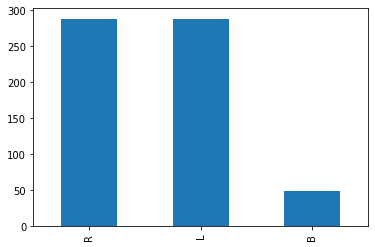

In [4]:
df['Class Name'].value_counts().plot.bar()

### Data Prep

In [5]:
X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.3 ) #, random_state = 100)

## CART

In [7]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [8]:
clf_gini.min_impurity_decrease, clf_gini.feature_importances_

(0.0, array([0.28177008, 0.21085738, 0.2760582 , 0.23131434]))

In [9]:
y_pred = clf_gini.predict(X_train)

clf_gini.score(X_train, y_train)

0.8581235697940504

In [10]:
metrics.confusion_matrix(y_pred, y_train)

array([[  8,   5,   7],
       [ 10, 190,  10],
       [ 17,  13, 177]])

### ID3

In [11]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)

In [12]:
y_pred = clf_entropy.predict(X_train)
clf_entropy.score(X_train, y_train)

0.8535469107551488

In [13]:
metrics.confusion_matrix(y_pred, y_train)

array([[  5,   4,   2],
       [ 17, 195,  19],
       [ 13,   9, 173]])

### With Test Data

In [14]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)
clf.fit(X_test, y_test)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)

In [15]:
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8882978723404256

In [16]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           B       0.29      0.67      0.40         6
           L       0.93      0.87      0.90        85
           R       0.95      0.92      0.93        97

    accuracy                           0.89       188
   macro avg       0.72      0.82      0.74       188
weighted avg       0.92      0.89      0.90       188



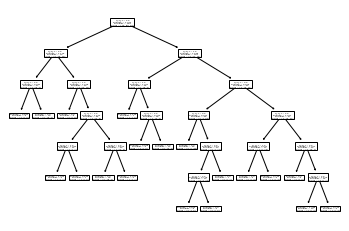

In [17]:
plot_tree(clf)
plt.show()